### Example 1: Curve fitting in scipy for linear example. 
Check out scipy website for more possibilities, how to extract other information about the fit and possibly examples.

slope = 7.455 +/- 0.277
intercept = -1.818 +/- 1.639


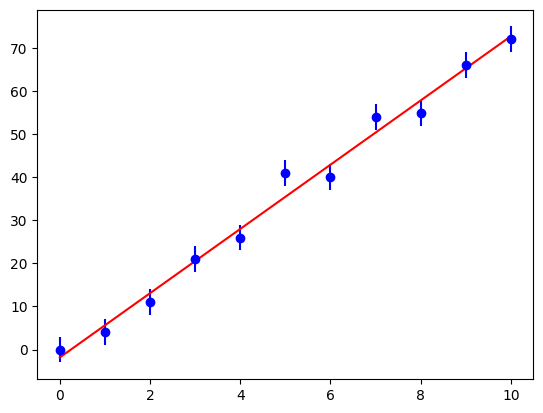

In [5]:
#!/usr/bin/env python
'''
    curve_fit_template.py
    Eric Ayars
    June 2016

    This is a "code template" for arbitrary curve fitting with Python,
    using scipy.optimize.curve_fit(). It is meant to show how to do
    curve fitting to someone not previously familiar with use of this
    function.

    This uses linear data as an example.
'''

from pylab import *                     # graphing, numpy, etc.
from scipy.optimize import curve_fit    # curve fit routine

# Here we define the model to which we are fitting the data.
# The equation (and number of parameters, even) would be different
# for different models: linear is shown here as an example.
def line(x, m, b):
    # x is the independent variable
    # m is the slope
    # b is the intercept
    y = m*x + b
    return y

# Load the data from a text file.
x,y = loadtxt("calibration.txt", unpack=True)
# If the data file has more than two columns, adjust accordingly
# x,y,dy = loadtxt("data/centripetal.txt", unpack=True)

# form a guess as to what the parameters should be. This guess is
# usually not critical, although for best results avoid having all
# parameters be zero. For oscillating models, the quality of these
# guesses actually matters.
# The order of parameters in the guess array matches the order of 
# coefficients in the model definition.
guess = array([1, 1])

# Now do the curve fitting itself.
# curve_fit() returns two items: 
#   an array of best fit parameters
#   the covariance matrix
# curve_fit() requires three things:
#   the function definition for the model
#   the x data
#   the y data
# curve_fit() optionally takes:
#   p0: an array of starting guesses for parameters ('guess', above)
#   sigma: an array of y uncertainties
#   other things, see scipy.optimize.curve_fit() documentation
parameters, covariance = curve_fit(line, x, y, p0=guess, sigma=None)

# Extract individual parameters and uncertainties from the results
m = parameters[0]
b = parameters[1]
dm = sqrt(covariance[0,0])
db = sqrt(covariance[1,1])

# now do something with the results
print("slope = %0.3f +/- %0.3f" % (m, dm))
print("intercept = %0.3f +/- %0.3f" % (b, db))

# we can also use the parameters to show the curve fit on the dataplot.
# The errorbar() function needs error for each point, and this data has 
# a fixed estimate of error, so change that error to an array of errors.
yerrors = array([3.0 for j in range(len(x))])
# now plot, with errorbars
errorbar(x, y, yerr=yerrors, fmt='bo')
plot(x, line(x, parameters[0], parameters[1]), 'r-')
show()



### Example 2: Curve fitting in scipy for damped oscillator example. 
Check out scipy website for more possibilities, how to extract other information about the fit and possibly examples.

a = 2.174 +/- 0.009
tau = 1.895 +/- 0.012
omega = 3.801 +/- 0.004
phi = -0.444 +/- 0.005
offset = -0.763 +/- 0.002


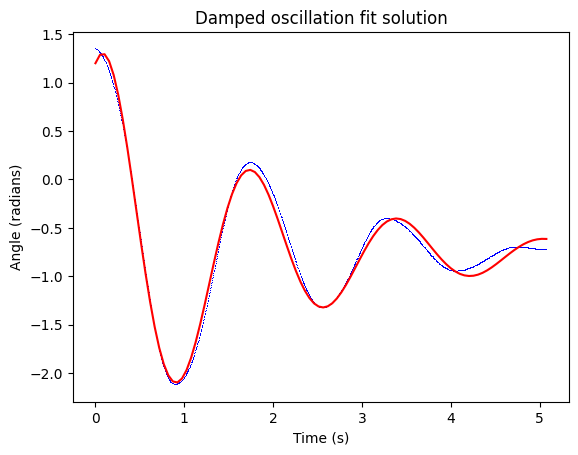

In [4]:
#!/usr/bin/env python
'''
    damped_fit.py
    Eric Ayars
    June 2016

    This is a solution to Exercise 4, exponential fit.
'''

from pylab import *                     # graphing, numpy, etc.
from scipy.optimize import curve_fit    # curve fit routine

# Here we define the model to which we are fitting the data.
def damped(t, a, tau, omega, phi, offset):
    y = a*exp(-t/tau)*cos(omega*t + phi) + offset
    return y

# Load the data from a text file.
#t, q = loadtxt("data/damped_oscillation.txt", unpack=True)
t, q = loadtxt("damped_oscillation.txt", unpack=True)

# guess as to what the parameters should be.
guess = array([1.3,2.0,4.0,0.0,-0.7])

# Now do the curve fitting.
parameters, covariance = curve_fit(damped, t, q, p0=guess)

# Extract individual parameters and uncertainties from the results
a = parameters[0]
da = sqrt(covariance[0,0])
tau = parameters[1]
dtau = sqrt(covariance[1,1])
omega = parameters[2]
dOmega = sqrt(covariance[2,2])
phi = parameters[3]
dPhi = sqrt(covariance[3,3])
offset = parameters[4]
dOffset = sqrt(covariance[4,4])

# now do something with the results
print("a = %0.3f +/- %0.3f" % (a, da))
print("tau = %0.3f +/- %0.3f" % (tau, dtau))
print("omega = %0.3f +/- %0.3f" % (omega, dOmega))
print("phi = %0.3f +/- %0.3f" % (phi, dPhi))
print("offset = %0.3f +/- %0.3f" % (offset, dOffset))

# now plot
plot(t, q, 'b,')
# plot the curve fit also
t2 = linspace(min(t),max(t),100)
plot(t2, damped(t2, a, tau, omega, phi, offset), 'r-')

# make it pretty
xlabel('Time (s)')
ylabel('Angle (radians)')
title('Damped oscillation fit solution')
show()

